In [1]:
import pandas as pd
import sklearn 
import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston 
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [2]:
boston=load_boston()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [4]:
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) # why fit_transform ??
X_test_scaled = scaler.transform(X_test)

In [5]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [6]:
print(X_train.shape)
print(X_train_poly.shape) # keep in mind 13*6 mixed terms, 13 squares, 13 degree 1 terms, 1 bias term = 105

(379, 13)
(379, 105)


In [7]:
from sklearn.linear_model import Ridge 
ridge = Ridge().fit(X_train, y_train)
print("score without scaling: %.3f" %ridge.score(X_test,y_test))
ridge_scaled = Ridge().fit(X_train_scaled, y_train)
print("score with scaling but without interactions: %.3f" % ridge_scaled.score(X_test_scaled,y_test))
ridge_poly = Ridge().fit(X_train_poly, y_train)
print("score with scaling and with polynomial interactions: %.3f" %ridge_poly.score(X_test_poly,y_test) )

score without scaling: 0.627
score with scaling but without interactions: 0.621
score with scaling and with polynomial interactions: 0.753


In [8]:
# lets see what happens if we have a more complex model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
print("score without scaling: %.3f" %rf.score(X_test,y_test))
rf_scaled = RandomForestRegressor(n_estimators = 100).fit(X_train_scaled, y_train)
print("score with scaling but without interactions: %.3f" %rf_scaled.score(X_test_scaled,y_test))
rf_poly = RandomForestRegressor(n_estimators = 100).fit(X_train_poly, y_train)
print("score with scaling but with interactions: %.3f" %rf_poly.score(X_test_poly,y_test))

score without scaling: 0.794
score with scaling but without interactions: 0.804
score with scaling but with interactions: 0.772


In [9]:
# Univariate non-linear transformations
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w=rnd.normal(size=3)
X=np.random.poisson(10*np.exp(X_org)) # What exactly is this guy doing?
y=np.dot(X_org,w)

In [10]:
np.bincount(X[:,0]) # bincount takes an array of non-negative integers and counts the occurence of each 

array([14, 45, 66, 52, 42, 52, 47, 61, 59, 46, 39, 41, 34, 30, 20, 21, 16,
       21, 23, 15, 11, 16, 13, 15, 12, 15,  9, 10,  6, 14, 11,  8,  5,  6,
        5,  4,  4,  5,  5,  2,  0,  4,  3,  5,  4,  7,  1,  2,  1,  0,  1,
        2,  3,  2,  3,  4,  0,  3,  0,  0,  0,  0,  1,  3,  2,  2,  2,  1,
        1,  1,  2,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,
        2,  0,  0,  1,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,
        0,  2,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1])

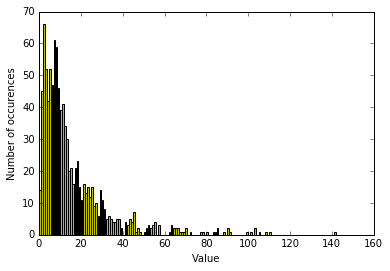

In [17]:
bins = np.bincount(X[:,0]) # Related to above question what is X[:,0] doing as opposed X[:,1] or X[:,2] ?
plt.bar(range(len(bins)), bins, color ='y')
plt.ylabel("Number of occurences")
plt.xlabel("Value")
plt.figure(figsize=(20,5), dpi=900) # How do I make this plot bigger?

In [12]:
from sklearn.linear_model import Ridge 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print("test score: %.3f" %score )

test score: 0.621


In [13]:
X_train_log = np.log(X_train+1) # we +1 as we have a bunch of zeros and log is not defined at 0
X_test_log = np.log(X_test +1)
# what log does here is: 1) disrtibution less asymmetrial 2) reduces large outliers 

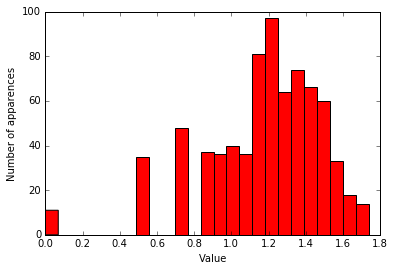

In [15]:
plt.hist(np.log(X_train_log[:,0]+1), bins = 25, color = 'red') # why log of log ? what does this do?
plt.ylabel("Number of apparences")
plt.xlabel("Value")

In [19]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("test score: %.3f" %score)

test score: 0.850


In [39]:
# Univariate statistics
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile 
from sklearn.cross_validation import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42) # 42 as random state? what does this do? 
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data, noise])

X_train,X_test,y_train,y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5) # what is the role of random state
select = SelectPercentile(percentile = 10) # what is percentile?
select.fit(X_train, y_train) #why first fit and then transform ?

X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)

(284, 80)
(284, 8)


[ True False  True False False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


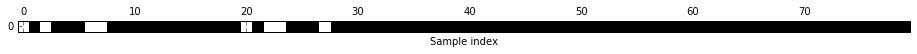

In [40]:
mask = select.get_support() # returns boolean sequence
print(mask)
plt.matshow(mask.reshape(1,-1), cmap = plt.cm.gray) #why reshape ? what is cmap ? what is matshow?
plt.xlabel("Sample index")

In [41]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Score with all features: %.3f" %lr.score(X_test, y_test))
lr.fit(X_train_selected,y_train)
print("Score with only selected features: %.3f" %lr.score(X_test_selected, y_test))

Score with all features: 0.930
Score with only selected features: 0.947


In [ ]:
# exercise: plot accuracy in terms of percentile, you have to define a function 

In [53]:
# Model-based Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state =42))
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 17)


test score: 0.958


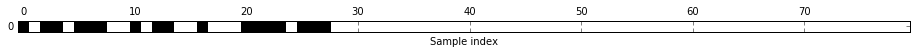

In [55]:
# if you want to have a look at what features are selected
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print("test score: %.3f" %score)

In [56]:
# SelectFromModel has an argument trehsold, draw a plot that gives accuracy in terms of treshold, find optimal treshod.


test score: 0.951


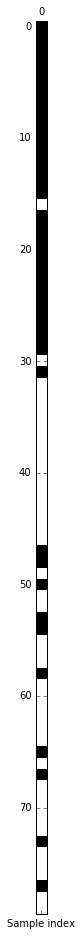

In [57]:
# Iterative feature selection, principle- a series of models is built: 
# Starting with no features (or all features), adding features one by one, until some stopping criteria.
# more computationally expensive than previous models
# example RFE (recursive feature elimination): starts with features, builds model, discard least important ones, and reiterates

from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select = 40)
# select = RFE(LogisticRegression(penality="l1"), n_features_to_select = 40)

select.fit(X_train,y_train)
mask=select.get_support()
plt.matshow(mask.reshape(-1,1), cmap='gray_r')
plt.xlabel("Sample index")
# plots the selected features
# takes significantly longer than previous methods
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe,y_train).score(X_test_rfe,y_test)
print("test score: %.3f" %score )

In [58]:
# Exercise: plot accuracy in terms of n_features_to_select

In [59]:
print("test score: %.3f" %select.score(X_test,y_test))

test score: 0.951


In [60]:
# Utilizing expert knowledge 
# to load data do: git clone git@github.com:amueller/introduction_to_ml_with_python.git
# this will require SSH key,which you have to update, see: https://github.com/settings/keys
# the next issue will be that the book uses an released version of scikitlearn: https://github.com/amueller/introduction_to_ml_with_python/issues/1#issuecomment-223384207